# Sentinel-2 L2A Analytic (GeoTIFF)
This notebook provides details on how to access Sentinel-2 data (L2A pre-processing or Bottom Of Atmosphere (BOA) reflectance images). 
Sentinel-2 Level-2A products have been available over Europe since March 2018, and later extended gloablly as of December 2018.

In [2]:
# import SDK
import up42

In [3]:
# Authenticate user and initialise project
up42.authenticate(project_id="5678", 
                  project_api_key="uvwx")
project = up42.initialize_project()

2021-03-19 16:45:59,477 - Authentication with UP42 successful!
2021-03-19 16:46:00,349 - Initialized Project(name: S2l2a-Analytics-data-example, project_id: 1f2bad99-daad-4a60-9192-5169263caff6, description: , createdAt: 2021-03-18T14:39:08.255254Z)


In [4]:
# Define the aoi
aoi = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
              [
                14.610298,
                -24.516841
              ],
              [
                14.622478,
                -24.516841
              ],
              [
                14.622478,
                -24.50833
              ],
              [
                14.610298,
                -24.50833
              ],
              [
                14.610298,
                -24.516841
              ]
          ]
        ]
      }
    }
  ]
}

In [5]:
# Construct the workflow
workflow = project.create_workflow(name="Sentinel2-l2-analytics-example", use_existing=True)
input_tasks = ["Sentinel-2 L2A (GeoTIFF)", "Sharpening Filter"]
workflow.add_workflow_tasks(input_tasks)

2021-03-19 16:46:11,248 - Getting existing workflows in project ...
2021-03-19 16:46:11,718 - Got 1 workflows for project 1f2bad99-daad-4a60-9192-5169263caff6.
100%|██████████| 1/1 [00:00<00:00,  1.50it/s]
2021-03-19 16:46:12,396 - Using existing workflow: Sentinel2-l2-analytics-example - 00e94c32-7cfe-40b8-85b6-cc2ffa980c75
2021-03-19 16:46:16,343 - Added tasks to workflow: [{'name': 'esa-s2-l2a-gtiff:1', 'parentName': None, 'blockId': '4471e5ef-90f1-4bf0-9243-66bc9d8b4c99'}, {'name': 'sharpening:1', 'parentName': 'esa-s2-l2a-gtiff:1', 'blockId': 'e374ea64-dc3b-4500-bb4b-974260fb203e'}]


In [6]:
# Define the aoi and input parameters of the workflow to run it
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation='intersects', 
                                                 start_date="2018-11-07", 
                                                 end_date="2020-12-31",
                                                 limit=1)
input_parameters["esa-s2-l2a-gtiff:1"].update({"max_cloud_cover":10})

In [7]:
# Price Estimation
workflow.estimate_job(input_parameters)

2021-03-19 16:49:21,218 - Estimated: 2-2 Credits, Duration: 216-244 min.


{'esa-s2-l2a-gtiff:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 1.168825,
    'max': 1.168825},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}},
 'sharpening:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 1.168825,
    'max': 1.168825},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 12967, 'max': 14696},
   'credit': {'min': 1, 'max': 1}}}}

In [8]:
# Run test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-19 16:49:24,807 - +++++++++++++++++++++++++++++++++
2021-03-19 16:49:24,810 - Running this job as Test Query...
2021-03-19 16:49:24,811 - +++++++++++++++++++++++++++++++++
2021-03-19 16:49:24,812 - Selected input_parameters: {'esa-s2-l2a-gtiff:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'max_cloud_cover': 10, 'intersects': {'type': 'Polygon', 'coordinates': (((14.610298, -24.516841), (14.622478, -24.516841), (14.622478, -24.50833), (14.610298, -24.50833), (14.610298, -24.516841)),)}}, 'sharpening:1': {'strength': 'medium'}, 'config': {'mode': 'DRY_RUN'}}
2021-03-19 16:49:26,492 - Created and running new job: 0b232d8d-ded0-4082-8b7b-d75a1e5e3bba.
2021-03-19 16:49:26,933 - Tracking job status continuously, reporting every 30 seconds...
2021-03-19 16:49:54,837 - Job finished successfully! - 0b232d8d-ded0-4082-8b7b-d75a1e5e3bba


In [9]:
# Run actual Job
job = workflow.run_job(input_parameters, track_status=True)

2021-03-19 16:51:07,574 - Selected input_parameters: {'esa-s2-l2a-gtiff:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'max_cloud_cover': 10, 'intersects': {'type': 'Polygon', 'coordinates': (((14.610298, -24.516841), (14.622478, -24.516841), (14.622478, -24.50833), (14.610298, -24.50833), (14.610298, -24.516841)),)}}, 'sharpening:1': {'strength': 'medium'}}
2021-03-19 16:51:14,797 - Created and running new job: 76de7f0d-fe63-4026-ab4b-b8a9de151438.
2021-03-19 16:51:15,292 - Tracking job status continuously, reporting every 30 seconds...
2021-03-19 16:51:48,623 - Job is RUNNING! - 76de7f0d-fe63-4026-ab4b-b8a9de151438
2021-03-19 16:52:05,160 - Job finished successfully! - 76de7f0d-fe63-4026-ab4b-b8a9de151438


In [10]:
# Downlod Results
job.download_results()

2021-03-19 16:52:14,681 - Downloading results of job 76de7f0d-fe63-4026-ab4b-b8a9de151438
2021-03-19 16:52:14,685 - Download directory: /Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_76de7f0d-fe63-4026-ab4b-b8a9de151438
22it [00:00, 57852.47it/s]
2021-03-19 16:52:16,069 - Download successful of 2 files to output_directory '/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_76de7f0d-fe63-4026-ab4b-b8a9de151438': ['S2B_33JVN_20201215_0_L2A.tif', 'data.json']


['/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_76de7f0d-fe63-4026-ab4b-b8a9de151438/S2B_33JVN_20201215_0_L2A.tif',
 '/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_76de7f0d-fe63-4026-ab4b-b8a9de151438/data.json']

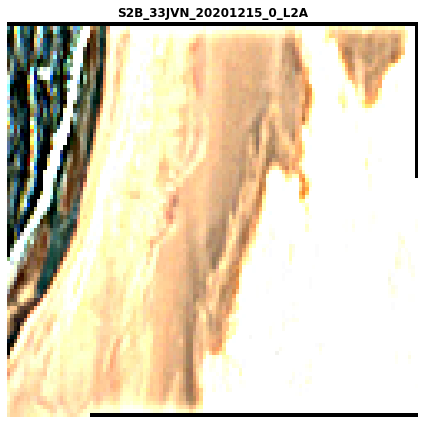

In [11]:
# Plot Results
job.plot_results(figsize=(6,6))